# ASTRO 9 - Final Project - Luminosity Analysis 


Orbital Periods vs. Luminosity

In [134]:
########################################
### This file is created by: Aaron Su###
## University of California - Berkeley##
############# Astronomy 9 ##############
############# Summer 2022 ##############
#    _                     _                 _ _            ___              _           _     
#   | |                   (_)               (_) |          / _ \            | |         (_)    
#   | |    _   _ _ __ ___  _ _ __   ___  ___ _| |_ _   _  / /_\ \_ __   __ _| |_   _ ___ _ ___ 
#   | |   | | | | '_ ` _ \| | '_ \ / _ \/ __| | __| | | | |  _  | '_ \ / _` | | | | / __| / __|
#   | |___| |_| | | | | | | | | | | (_) \__ \ | |_| |_| | | | | | | | | (_| | | |_| \__ \ \__ \
#   \_____/\__,_|_| |_| |_|_|_| |_|\___/|___/_|\__|\__, | \_| |_/_| |_|\__,_|_|\__, |___/_|___/
#                                                __/ |                       __/ |          
#                                               |___/                       |___/           
#
#
# Version 0.0.1

#Libary Import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as scint
import scipy.optimize as sco



#Dataframe
Location = r'dataframe (1).csv'
d = pd.read_csv(Location)
df = pd.DataFrame(d)
df


,System,Period (days),V,Spectral type,Mass (Msun),Radius (Rsun),Surface gravity (cgs),log Teff (K),log (L/Lsun),[M/H],...,Unnamed: 11,B-V,Sec Spectral type,Sec Mass (Msun ),Sec Radius (Rsun),Sec Surface gravity (cgs),Sec Log Teff (K),Sec log (L/Lsun),(dex),Unnamed: 20
0,V3903 Sgr,1.744,7.27,O7_V,27.27 ± 0.55,8.088 ± 0.086,4.058 ± 0.016,4.580 ± 0.021,5.087 ± 0.029,NaN,...,NaN,0.06,O9_V,19.01 ± 0.44,6.125 ± 0.060,4.143 ± 0.013,4.531 ± 0.021,4.658 ± 0.032,NaN,NaN
1,V467 Vel,2.753,10.90,O6_Vf,25.3 ± 0.7,9.99 ± 0.09,3.842 ± 0.016,4.559 ± 0.031,5.187 ± 0.126,NaN,...,NaN,0.00,B1_V,8.25 ± 0.17,3.49 ± 0.03,4.268 ± 0.017,4.402 ± 0.046,3.649 ± 0.110,NaN,NaN
2,CC Cas,3.366,7.08,O8.5_III,23.49 ± 0.92,10.87 ± 0.18,3.736 ± 0.013,4.538 ± 0.025,5.179 ± 0.053,NaN,...,NaN,0.48,B0.5_V,9.95 ± 0.34,6.84 ± 0.18,3.766 ± 0.022,4.452 ± 0.031,4.474 ± 0.064,NaN,NaN
3,EM Car,3.414,8.38,O8_V,22.89 ± 0.32,9.35 ± 0.17,3.856 ± 0.017,4.531 ± 0.026,5.02 ± 0.10,NaN,...,NaN,-0.31,O8_V,21.43 ± 0.33,8.34 ± 0.14,3.926 ± 0.016,4.531 ± 0.026,4.92 ± 0.10,NaN,NaN
4,δ Cir,3.902,5.09,O7_IV,20.00 ± 0.50,9.256 ± 0.091,3.806 ± 0.007,4.574 ± 0.010,5.184 ± 0.070,NaN,...,NaN,-0.06,O9.5_V,11.41 ± 0.24,5.326 ± 0.091,4.043 ± 0.014,4.519 ± 0.013,4.339 ± 0.090,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,UScoCTIO 5,34.001,16.19,M4.5_V,0.3393 ± 0.0020,0.8733 ± 0.0024,4.0859 ± 0.0021,3.515 ± 0.013,-1.105 ± 0.053,NaN,...,NaN,1.62,M4.5_V,0.3263 ± 0.0020,0.8376 ± 0.0024,4.1053 ± 0.0021,3.513 ± 0.013,-1.146 ± 0.059,NaN,NaN
288,KOI-126 BC,1.722,-1.00,M,0.2352 ± 0.0006,0.2545 ± 0.0008,4.998 ± 0.003,3.510 ± 0.005,-2.194 ± 0.020,0.15,...,NaN,-1.00,M,0.2073 ± 0.0006,0.2315 ± 0.0007,5.026 ± 0.003,3.501 ± 0.005,-2.312 ± 0.020,± 0.08,NaN
289,CM Dra,1.268,12.90,M4.5_V,0.2310 ± 0.0009,0.2534 ± 0.0019,4.994 ± 0.007,3.496 ± 0.010,-2.258 ± 0.038,-0.30,...,NaN,1.60,M4.5_V,0.2141 ± 0.0009,0.2396 ± 0.0015,5.009 ± 0.006,3.494 ± 0.014,-2.313 ± 0.056,± 0.12,NaN
290,NGTS J052218.2-250710.4,1.748,16.88,M5_V,0.1739 ± 0.0013,0.2045 ± 0.0048,5.057 ± 0.021,3.476 ± 0.014,NaN,NaN,...,NaN,1.49,M5_V,0.1742 ± 0.0013,0.2168 ± 0.0048,5.007 ± 0.020,3.477 ± 0.012,NaN,NaN,NaN


# Scenario 1


Log(L/Sun) v.s. Orbital Period (Days)

In [136]:
#Replaces the spaces in the dataframe column headers
df.columns = [c.replace(' ', '_') for c in df.columns]
#Replaces the parthanthesis in the dataframe column headers
df.columns = [c.replace('(', '_') for c in df.columns]
df.columns = [c.replace(')', '_') for c in df.columns]
#Replaces the slash in the dataframe column headers
df.columns = [c.replace('/', '_') for c in df.columns]
#drops nan values for Lumonsity and Period values
df.dropna(subset=['log__L_Lsun_', 'Period__days_'], inplace=True)
df

,System,Period__days_,V,Spectral_type,Mass__Msun_,Radius__Rsun_,Surface_gravity__cgs_,log_Teff__K_,log__L_Lsun_,[M_H],...,Unnamed:_11,B-V,Sec_Spectral_type,Sec_Mass__Msun__,Sec_Radius__Rsun_,Sec_Surface_gravity__cgs_,Sec_Log_Teff__K_,Sec_log__L_Lsun_,_dex_,Unnamed:_20
0,V3903 Sgr,1.744,7.27,O7_V,27.27 ± 0.55,8.088 ± 0.086,4.058 ± 0.016,4.580 ± 0.021,5.087 ± 0.029,NaN,...,NaN,0.06,O9_V,19.01 ± 0.44,6.125 ± 0.060,4.143 ± 0.013,4.531 ± 0.021,4.658 ± 0.032,NaN,NaN
1,V467 Vel,2.753,10.90,O6_Vf,25.3 ± 0.7,9.99 ± 0.09,3.842 ± 0.016,4.559 ± 0.031,5.187 ± 0.126,NaN,...,NaN,0.00,B1_V,8.25 ± 0.17,3.49 ± 0.03,4.268 ± 0.017,4.402 ± 0.046,3.649 ± 0.110,NaN,NaN
2,CC Cas,3.366,7.08,O8.5_III,23.49 ± 0.92,10.87 ± 0.18,3.736 ± 0.013,4.538 ± 0.025,5.179 ± 0.053,NaN,...,NaN,0.48,B0.5_V,9.95 ± 0.34,6.84 ± 0.18,3.766 ± 0.022,4.452 ± 0.031,4.474 ± 0.064,NaN,NaN
3,EM Car,3.414,8.38,O8_V,22.89 ± 0.32,9.35 ± 0.17,3.856 ± 0.017,4.531 ± 0.026,5.02 ± 0.10,NaN,...,NaN,-0.31,O8_V,21.43 ± 0.33,8.34 ± 0.14,3.926 ± 0.016,4.531 ± 0.026,4.92 ± 0.10,NaN,NaN
4,δ Cir,3.902,5.09,O7_IV,20.00 ± 0.50,9.256 ± 0.091,3.806 ± 0.007,4.574 ± 0.010,5.184 ± 0.070,NaN,...,NaN,-0.06,O9.5_V,11.41 ± 0.24,5.326 ± 0.091,4.043 ± 0.014,4.519 ± 0.013,4.339 ± 0.090,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,LSPM J1112+7626,41.033,14.85,M4_V,0.3946 ± 0.0023,0.3860 ± 0.0054,4.861 ± 0.012,3.486 ± 0.024,-1.92 ± 0.08,NaN,...,NaN,1.49,none,0.2745 ± 0.0012,0.2978 ± 0.0048,4.929 ± 0.014,3.470 ± 0.023,-2.21 ± 0.09,NaN,NaN
287,UScoCTIO 5,34.001,16.19,M4.5_V,0.3393 ± 0.0020,0.8733 ± 0.0024,4.0859 ± 0.0021,3.515 ± 0.013,-1.105 ± 0.053,NaN,...,NaN,1.62,M4.5_V,0.3263 ± 0.0020,0.8376 ± 0.0024,4.1053 ± 0.0021,3.513 ± 0.013,-1.146 ± 0.059,NaN,NaN
288,KOI-126 BC,1.722,-1.00,M,0.2352 ± 0.0006,0.2545 ± 0.0008,4.998 ± 0.003,3.510 ± 0.005,-2.194 ± 0.020,0.15,...,NaN,-1.00,M,0.2073 ± 0.0006,0.2315 ± 0.0007,5.026 ± 0.003,3.501 ± 0.005,-2.312 ± 0.020,± 0.08,NaN
289,CM Dra,1.268,12.90,M4.5_V,0.2310 ± 0.0009,0.2534 ± 0.0019,4.994 ± 0.007,3.496 ± 0.010,-2.258 ± 0.038,-0.30,...,NaN,1.60,M4.5_V,0.2141 ± 0.0009,0.2396 ± 0.0015,5.009 ± 0.006,3.494 ± 0.014,-2.313 ± 0.056,± 0.12,NaN


In [137]:
#S
df.columns

Index(['System', 'Period__days_', 'V', 'Spectral_type', 'Mass__Msun_',
       'Radius__Rsun_', 'Surface_gravity__cgs_', 'log_Teff__K_',
       'log__L_Lsun_', '[M_H]', 'Unnamed:_10', 'Unnamed:_11', 'B-V',
       'Sec_Spectral_type', 'Sec_Mass__Msun__', 'Sec_Radius__Rsun_',
       'Sec_Surface_gravity__cgs_', 'Sec_Log_Teff__K_', 'Sec_log__L_Lsun_',
       '_dex_', 'Unnamed:_20'],
      dtype='object')

In [138]:
#Grabs Sigma Values

lum = np.array(df['log__L_Lsun_'])
orbital = np.array(df['Period__days_'])

luminosity = []
lum_sigma = []

for i in range(len(lum)):
    luminosity.append(float(lum[i][0:5]))
    lum_sigma.append(float(lum[i][-5:-1]))

print(lum_sigma)

[0.02, 0.12, 0.05, 0.1, 0.07, 0.0, 0.0, 0.0, 0.0, 0.03, 0.01, 0.04, 0.06, 0.0, 0.04, 0.08, 0.04, 0.04, 0.0, 0.0, 0.03, 0.0, 0.04, 0.02, 0.0, 0.0, 0.03, 0.1, 0.03, 0.0, 0.02, 0.0, 0.0, 0.02, 0.03, 0.0, 0.03, 0.03, 0.02, 0.08, 0.05, 0.01, 0.02, 0.02, 0.03, 0.02, 0.0, 0.1, 0.0, 0.03, 0.03, 0.02, 0.03, 0.0, 0.03, 0.03, 0.0, 0.0, 0.0, 0.1, 0.04, 0.02, 0.02, 0.03, 0.04, 0.03, 0.03, 0.03, 0.0, 0.0, 0.04, 0.02, 0.0, 0.03, 0.02, 0.01, 0.0, 0.03, 0.0, 0.02, 0.02, 0.02, 0.04, 0.0, 0.0, 0.0, 0.03, 0.07, 0.0, 0.0, 0.0, 0.05, 0.04, 0.0, 0.05, 0.09, 0.03, 0.0, 0.0, 0.0, 0.03, 0.03, 0.0, 0.03, 0.0, 0.04, 0.03, 0.03, 0.03, 0.02, 0.04, 0.03, 0.03, 0.04, 0.01, 0.02, 0.02, 0.03, 0.03, 0.0, 0.0, 0.03, 0.0, 0.0, 0.0, 0.07, 0.02, 0.03, 0.03, 0.03, 0.0, 0.03, 0.0, 0.0, 0.05, 0.05, 0.02, 0.06, 0.0, 0.03, 0.0, 0.0, 0.0, 0.01, 0.04, 0.01, 0.03, 0.04, 0.03, 0.02, 0.0, 0.02, 0.03, 0.0, 0.03, 0.02, 0.01, 0.05, 0.01, 0.0, 0.03, 0.05, 0.03, 0.0, 0.0, 0.04, 0.01, 0.0, 0.03, 0.03, 0.01, 0.01, 0.01, 0.0, 0.0, 0.0, 0.09,

In [142]:
#Replaces the +- sign
#df['log__L_Lsun_'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-±]', value=r'')
#Sort Values in terms of Orbital Period
df = df.sort_values(by = 'Period__days_',kind='quicksort')
df = df.reset_index(drop=True)
df

,System,Period__days_,V,Spectral_type,Mass__Msun_,Radius__Rsun_,Surface_gravity__cgs_,log_Teff__K_,log__L_Lsun_,[M_H],...,Unnamed:_11,B-V,Sec_Spectral_type,Sec_Mass__Msun__,Sec_Radius__Rsun_,Sec_Surface_gravity__cgs_,Sec_Log_Teff__K_,Sec_log__L_Lsun_,_dex_,Unnamed:_20
0,V404 CMa,0.452,17.45,none,0.733 ± 0.005,0.72 ± 0.01,4.608 ± 0.012,3.623 ± 0.010,-0.867 ± 0.044,NaN,...,NaN,1.17,none,0.662 ± 0.005,0.68 ± 0.02,4.614 ± 0.025,3.596 ± 0.012,-1.028 ± 0.054,NaN,NaN
1,GU Boo,0.489,13.70,M1_V,0.610 ± 0.007,0.623 ± 0.016,4.634 ± 0.023,3.593 ± 0.014,-1.09 ± 0.06,NaN,...,NaN,1.50,M1_V,0.599 ± 0.006,0.620 ± 0.020,4.630 ± 0.028,3.581 ± 0.015,-1.14 ± 0.08,NaN,NaN
2,NSVS 10653195,0.561,12.50,K6_V,0.6402 ± 0.0052,0.687 ± 0.021,4.570 ± 0.027,3.628 ± 0.010,-0.863 ± 0.050,NaN,...,NaN,1.17,K7_V,0.6511 ± 0.0052,0.672 ± 0.020,4.597 ± 0.027,3.613 ± 0.012,-0.939 ± 0.055,NaN,NaN
3,CG Cyg,0.631,10.08,G9_V,0.94 ± 0.012,0.89 ± 0.013,4.512 ± 0.014,3.721 ± 0.015,-0.26 ± 0.06,NaN,...,NaN,0.86,K3_V,0.81 ± 0.013,0.84 ± 0.014,4.505 ± 0.016,3.674 ± 0.006,-0.51 ± 0.03,NaN,NaN
4,ASAS J212954-5620.1,0.702,11.93,none,0.833 ± 0.017,0.845 ± 0.012,4.506 ± 0.012,3.677 ± 0.014,-0.482 ± 0.057,NaN,...,NaN,1.17,none,0.703 ± 0.013,0.718 ± 0.017,4.574 ± 0.020,3.625 ± 0.019,-0.840 ± 0.076,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,OGLE SMC126.1 210,634.999,16.77,K2_III,1.674 ± 0.037,43.52 ± 1.02,1.385 ± 0.029,3.651 ± 0.007,2.836 ± 0.047,-0.87,...,NaN,1.20,K1_III,1.669 ± 0.039,39.00 ± 0.98,1.479 ± 0.031,3.654 ± 0.007,2.752 ± 0.049,± 0.15,NaN
242,OGLE-LMC-ECL-12669,749.632,17.21,K0.5_III,1.843 ± 0.029,24.17 ± 0.34,1.937 ± 0.012,3.666 ± 0.008,2.384 ± 0.034,-0.30,...,NaN,1.20,G9_III,1.962 ± 0.030,23.36 ± 0.30,1.994 ± 0.011,3.673 ± 0.009,2.386 ± 0.038,± 0.14,NaN
243,OGLE-LMC-SC9-230659,772.638,16.63,G6_III,3.598 ± 0.038,32.83 ± 0.22,1.962 ± 0.005,3.699 ± 0.006,2.783 ± 0.025,-0.24,...,NaN,1.09,G6_III,3.429 ± 0.030,23.40 ± 0.31,2.235 ± 0.011,3.702 ± 0.009,2.500 ± 0.036,± 0.11,NaN
244,KIC 5640750,987.398,11.88,none,1.515 ± 0.033,14.06 ± 0.12,2.323 ± 0.007,3.656 ± 0.007,1.871 ± 0.029,-0.29,...,NaN,1.24,none,1.292 ± 0.017,1.853 ± 0.023,4.014 ± 0.010,3.767 ± 0.015,0.555 ± 0.060,± 0.09,NaN


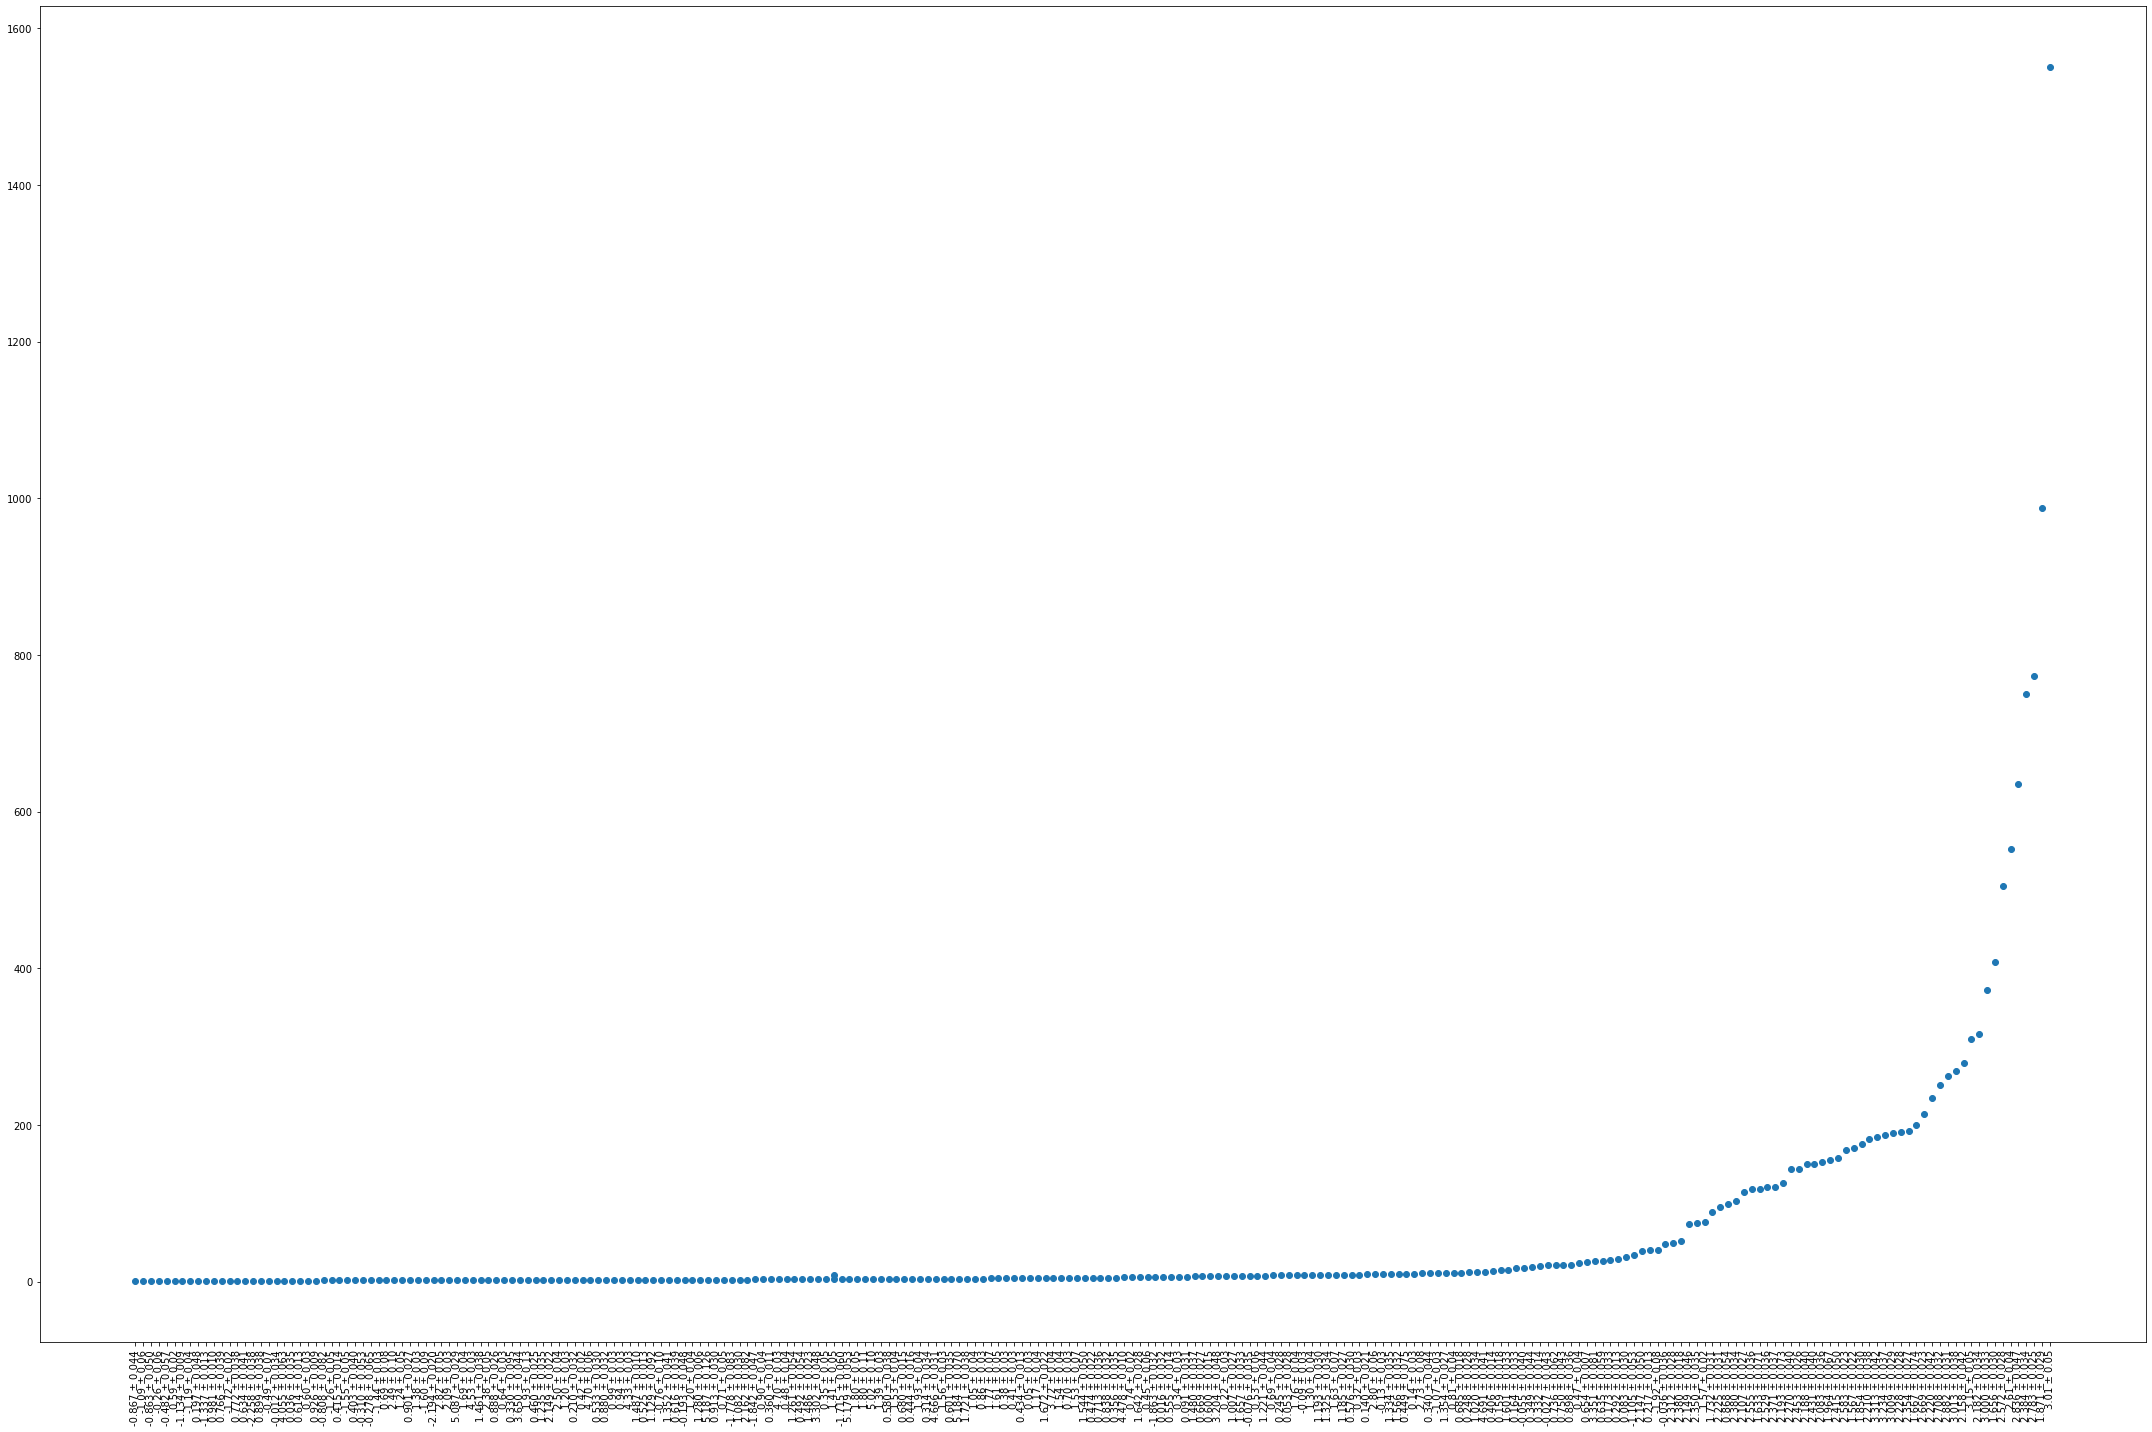

In [143]:
plt.figure()
plt.scatter(df.log__L_Lsun_, df.Period__days_)
plt.rcParams["figure.figsize"] = [30,20]
plt.rcParams["figure.autolayout"] = True
plt.xticks(rotation=90)
plt.autoscale(enable=True, axis=u'both', tight=False)